In [1]:
#importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
#reading data
data = pd.read_csv('Real estate.csv')
print(data.head())

   No Transaction_Date  House_Age  Distance_to_MRT  Num_Convenience_Stores  \
0   1       2012-12-01       32.0         84.87882                      10   
1   2       2012-12-01       19.5        306.59470                       9   
2   3       2013-07-30       13.3        561.98450                       5   
3   4       2013-07-01       13.3        561.98450                       5   
4   5       2012-10-30        5.0        390.56840                       5   

   Latitude  Longitude  House_Price  
0  24.98298  121.54024         37.9  
1  24.98034  121.53951         42.2  
2  24.98746  121.54391         47.3  
3  24.98746  121.54391         54.8  
4  24.97937  121.54245         43.1  


In [3]:
#checking for missing values
print(data.isnull().sum())

No                        0
Transaction_Date          0
House_Age                 0
Distance_to_MRT           0
Num_Convenience_Stores    0
Latitude                  0
Longitude                 0
House_Price               0
dtype: int64


In [4]:
#converting date col form string to date type
##########data['Transaction_Date'] = pd.to_datetime(data['Transaction_Date'])
#changing date to numeric value so it can be used for the model
data['Transaction_Date'] = pd.to_datetime(data['Transaction_Date']).map(pd.Timestamp.toordinal)

In [5]:
#saving changes 
data.to_csv('real_estate.csv', index=False)
print(data.head())

   No  Transaction_Date  House_Age  Distance_to_MRT  Num_Convenience_Stores  \
0   1            734838       32.0         84.87882                      10   
1   2            734838       19.5        306.59470                       9   
2   3            735079       13.3        561.98450                       5   
3   4            735050       13.3        561.98450                       5   
4   5            734806        5.0        390.56840                       5   

   Latitude  Longitude  House_Price  
0  24.98298  121.54024         37.9  
1  24.98034  121.53951         42.2  
2  24.98746  121.54391         47.3  
3  24.98746  121.54391         54.8  
4  24.97937  121.54245         43.1  


In [6]:
#loading updated dataset
data = pd.read_csv('real_estate.csv')
data.dtypes

No                          int64
Transaction_Date            int64
House_Age                 float64
Distance_to_MRT           float64
Num_Convenience_Stores      int64
Latitude                  float64
Longitude                 float64
House_Price               float64
dtype: object

C:\Users\kraty\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


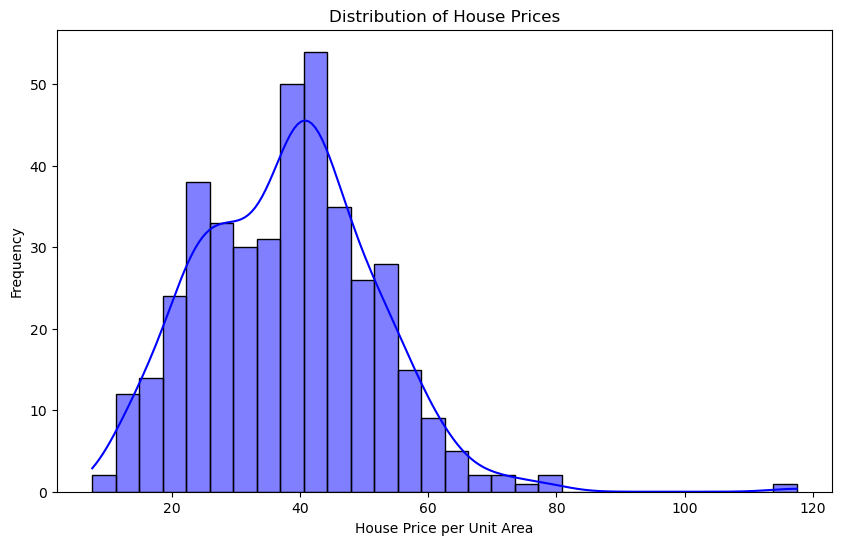

In [7]:
# Distribution plot of House_Price
plt.figure(figsize=(10, 6))
sns.histplot(data['House_Price'], kde=True, bins=30, color='blue')
plt.title('Distribution of House Prices')
plt.xlabel('House Price per Unit Area')
plt.ylabel('Frequency')
plt.show()

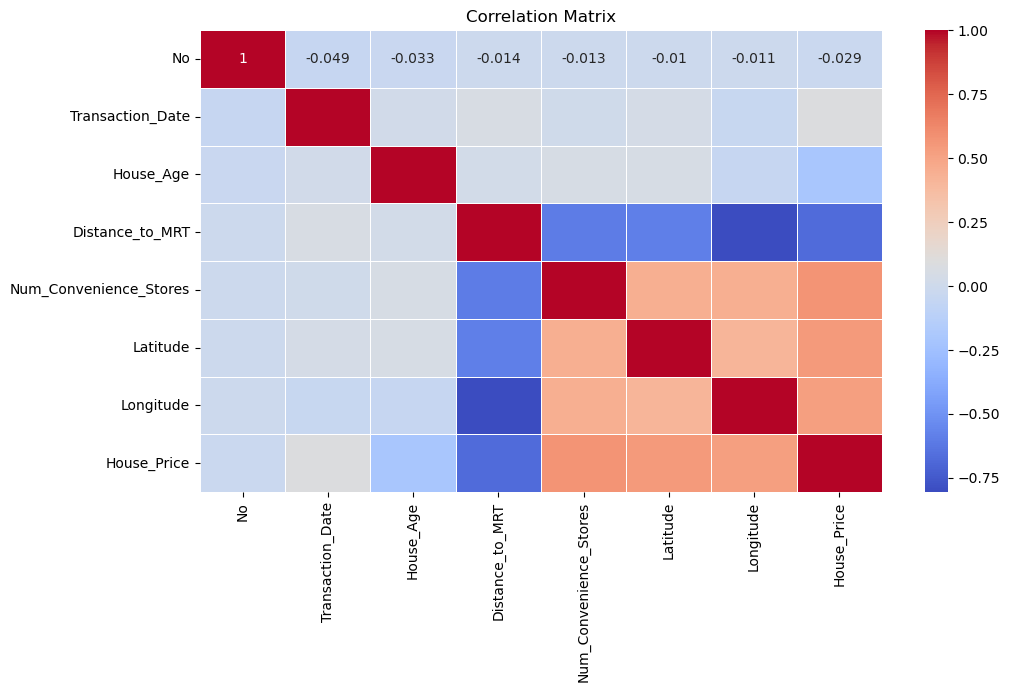

In [8]:
# Correlation matrix
correlation_matrix = data.corr()

# Heatmap
plt.figure(figsize=(11, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

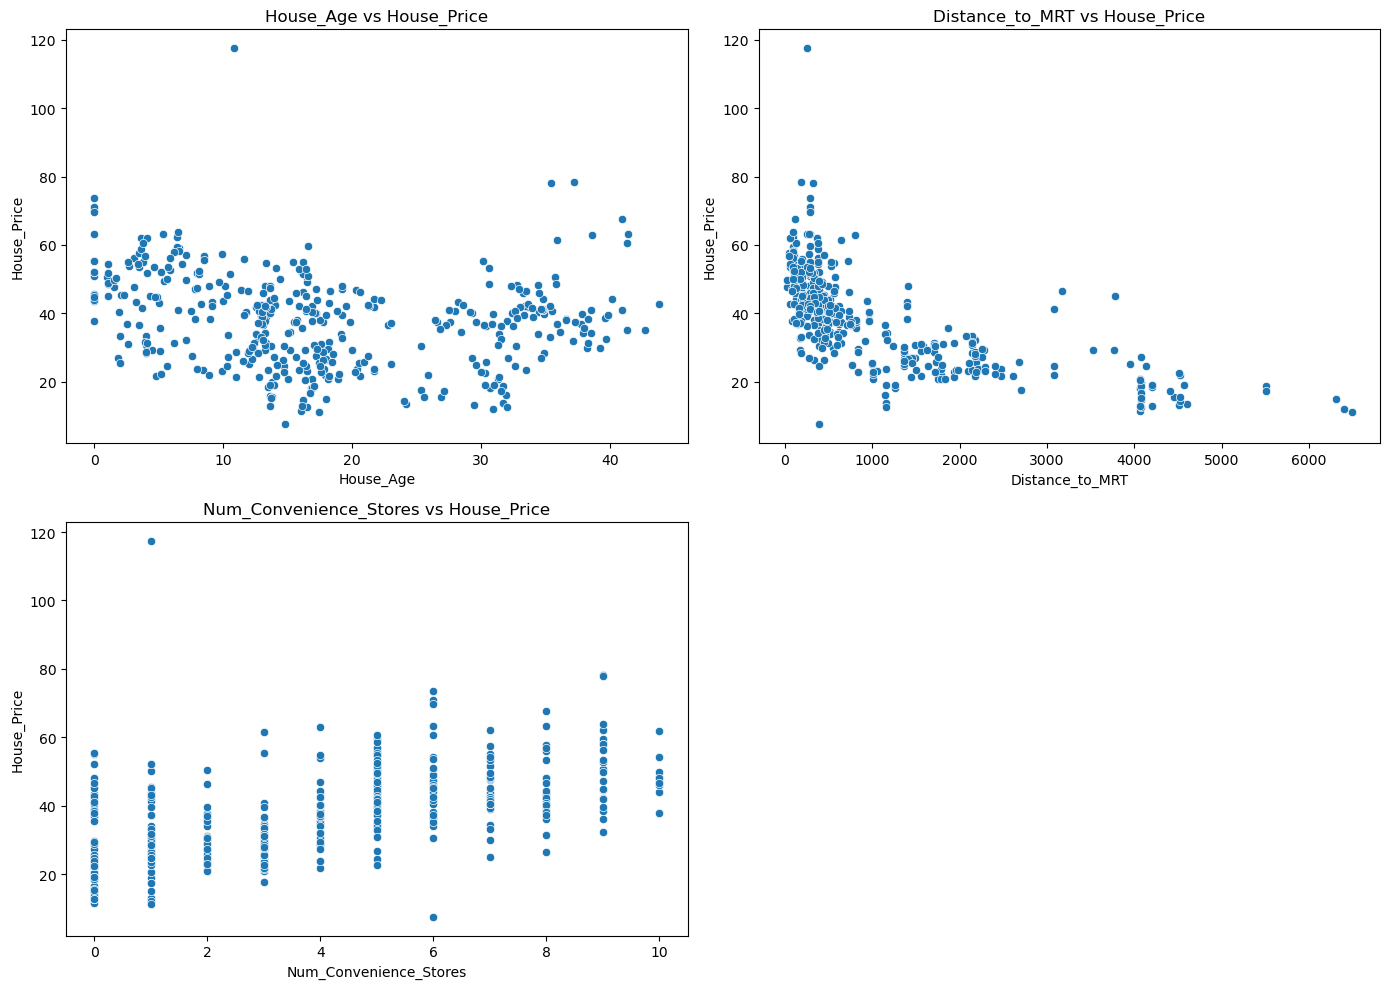

In [9]:
#selecting Features
selected_features = ['House_Age', 'Distance_to_MRT', 'Num_Convenience_Stores']  #i did not include transaction date here cause it was in numeric form
#and switching types would be redundant and messy

# Scatter plots for all features vs house price
plt.figure(figsize=(14, 10))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=data[feature], y=data['House_Price'])
    plt.title(f'{feature} vs House_Price')
plt.tight_layout()
plt.show()

In [10]:
#Implementing Random Forest Model#

#data columns to be used as features
X_selected = data[['House_Age', 'Distance_to_MRT', 'Num_Convenience_Stores', 'Transaction_Date']]
y = data['House_Price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Mkae prediction
y_pred = model.predict(X_test)

# Feature Importance
importances = model.feature_importances_
feature_names = X_selected.columns
forest_importances = pd.Series(importances, index=feature_names)

mape = (abs((y_test - y_pred) / y_test).mean()) * 100
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")

# calculating Accurary
accuracy = 100 - mape
print(f"Model Accuracy: {accuracy}%")

Mean Absolute Error (MAE): 4.339385599541023
Mean Squared Error (MSE): 35.06660190037401
R-squared: 0.7909712964772593
Mean Absolute Percentage Error (MAPE): 13.222795318656273%
Model Accuracy: 86.77720468134373%


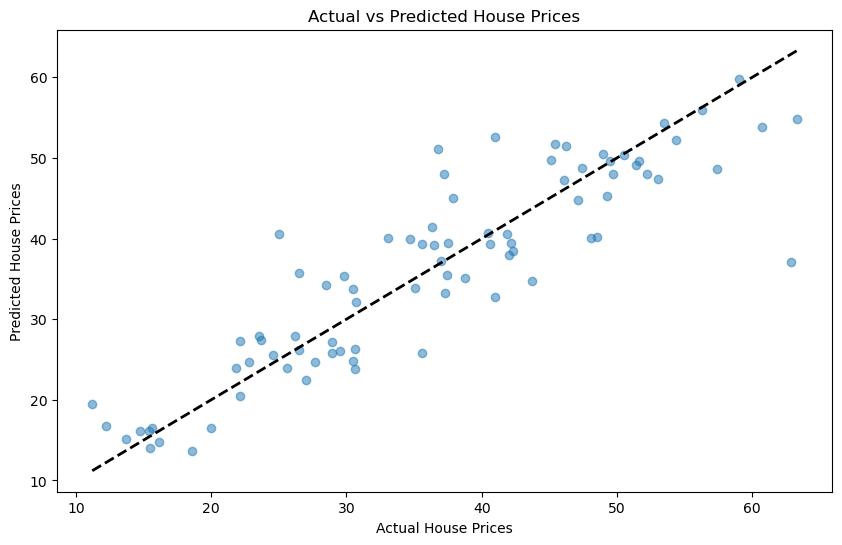

In [11]:
# Plot Predicted vs Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Actual vs Predicted House Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()


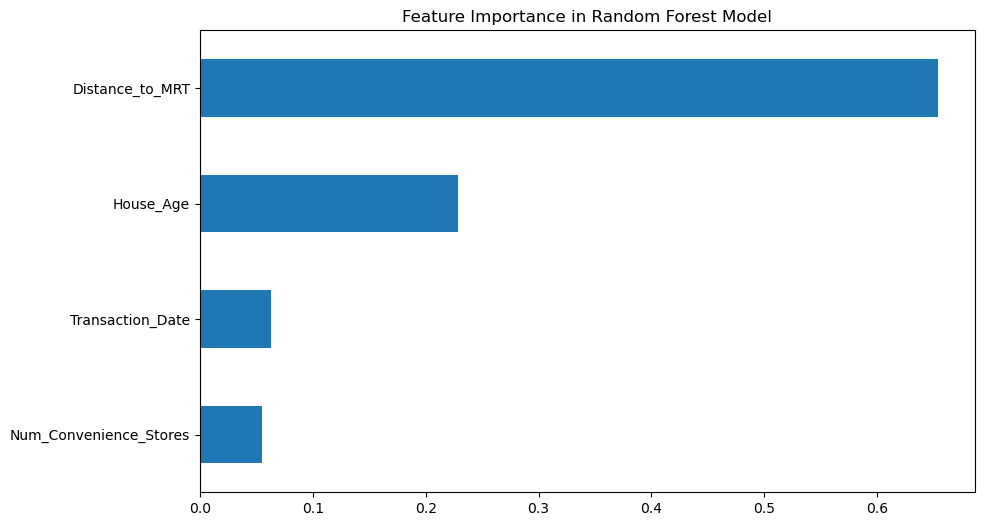

In [12]:
# Plot Feature Importance
plt.figure(figsize=(10, 6))
forest_importances.sort_values().plot(kind='barh')
plt.title('Feature Importance in Random Forest Model')
plt.show()